In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [21]:
data=pd.read_csv("crop_data.csv")
print(data.head(10))

    N   P   K  temperature   humidity        ph    rainfall    soil_type  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  Clayey soil   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  Clayey soil   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  Clayey soil   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  Clayey soil   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  Clayey soil   
5  69  37  42    23.058049  83.370118  7.073454  251.055000  Clayey soil   
6  69  55  38    22.708838  82.639414  5.700806  271.324860  Clayey soil   
7  94  53  40    20.277744  82.894086  5.718627  241.974195  Clayey soil   
8  89  54  38    24.515881  83.535216  6.685346  230.446236  Clayey soil   
9  68  58  38    23.223974  83.033227  6.336254  221.209196  Clayey soil   

        Climate label  
0        Summer  rice  
1  Post-monsoon  rice  
2        Summer  rice  
3       Monsoon  rice  
4       Monsoon  rice  
5       Monsoon  ri

In [22]:
# Display basic information and descriptive statistics for each column
info = data.info()
description = data.describe(include='all')

info, description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2100 non-null   int64  
 1   P            2100 non-null   int64  
 2   K            2100 non-null   int64  
 3   temperature  2100 non-null   float64
 4   humidity     2100 non-null   float64
 5   ph           2100 non-null   float64
 6   rainfall     2100 non-null   float64
 7   soil_type    2100 non-null   object 
 8   Climate      2100 non-null   object 
 9   label        2100 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 164.2+ KB


(None,
                   N            P           K  temperature     humidity  \
 count   2100.000000  2100.000000  2100.00000  2100.000000  2100.000000   
 unique          NaN          NaN         NaN          NaN          NaN   
 top             NaN          NaN         NaN          NaN          NaN   
 freq            NaN          NaN         NaN          NaN          NaN   
 mean      48.140000    54.535238    49.01619    25.619852    72.082347   
 std       35.952743    33.273853    51.67570     5.172657    22.577547   
 min        0.000000     5.000000     5.00000     8.825675    14.258040   
 25%       20.000000    29.000000    20.00000    22.602437    61.333844   
 50%       36.000000    53.000000    33.00000    25.563850    81.035571   
 75%       81.000000    69.000000    50.00000    28.684566    90.194600   
 max      140.000000   145.000000   205.00000    43.675493    99.981876   
 
                  ph     rainfall   soil_type Climate label  
 count   2100.000000  2100.00

Decision Tree Accuracy: 0.8833333333333333
Random Forest Accuracy: 0.9071428571428571


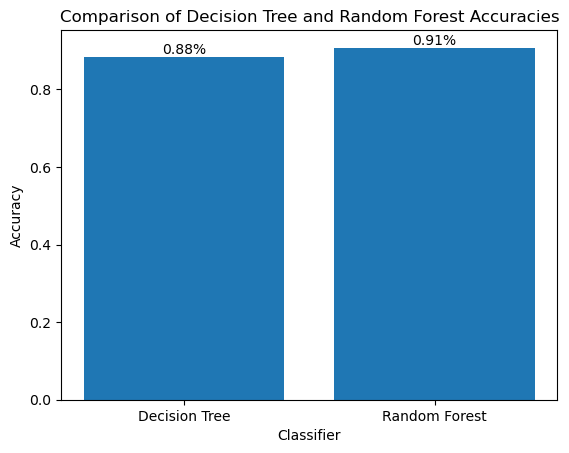

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('crop_data.csv')
 
# Keep only the required features
data = data[['temperature', 'humidity', 'rainfall', 'label']]
 
# Split the dataset into features and target variable
X = data.drop(columns=['label'])
y = data['label']
 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dt_clf = DecisionTreeClassifier()

# Train the Decision Tree classifier
dt_clf.fit(X_train, y_train)

# Predict on the test set using Decision Tree classifier
dt_y_pred = dt_clf.predict(X_test)

# Calculate accuracy using Decision Tree classifier
dt_accuracy = accuracy_score(y_test, dt_y_pred)

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier()

# Train the Random Forest classifier
rf_clf.fit(X_train, y_train)

# Predict on the test set using Random Forest classifier
rf_y_pred = rf_clf.predict(X_test)

# Calculate accuracy using Random Forest classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# Compare the accuracies
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

import matplotlib.pyplot as plt

# Define the labels and accuracies
labels = ['Decision Tree', 'Random Forest']
accuracies = [dt_accuracy, rf_accuracy]

# Create a bar plot
plt.bar(labels, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Decision Tree and Random Forest Accuracies')

# Add text annotations to the bars
for i, v in enumerate(accuracies):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

# Display the plot
plt.show()


In [25]:
# Initialize the Random Forest classifier
clf = RandomForestClassifier()
 
# Train the classifier
clf.fit(X_train, y_train)
 
# Predict on the test set
y_pred = clf.predict(X_test)
 
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
 

Accuracy: 0.9119047619047619


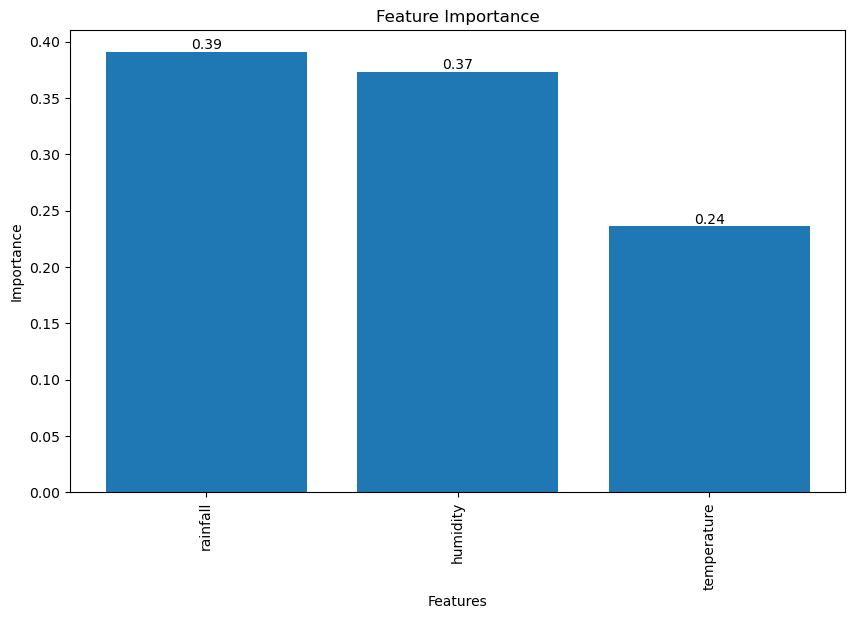

In [38]:
# Get the feature importances from the trained model
importances = clf.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a bar plot of the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')

# Add text annotations to the bars
for i, v in enumerate(importances[indices]):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.show()


In [19]:
import pickle

# Export the model
with open('crop_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [20]:
# Load the model
with open('crop_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [21]:
import joblib

# Save the trained model to a file
model_filename = 'crop_classifier_model.pkl'
joblib.dump(clf, model_filename)

print(f"Model saved as {model_filename}")

Model saved as crop_classifier_model.pkl


In [22]:
# Function to predict crops for given conditions
def predict_crops_for_conditions(conditions):
    print(conditions)
    # Preprocess the conditions and convert to DataFrame
    conditions_df = pd.DataFrame(conditions, index=[0])
    print(conditions_df)
    # Predict probabilities for all crop labels
    probs = model.predict_proba(conditions_df)[0]
    # Get indices of top probabilities
    top_indices = np.argsort(probs)[::-1]  # Sort probabilities in descending order
    # Initialize list to store predicted crops and their probabilities
    predicted_crops = []
    # Loop through top probabilities and add crops until two are found
    for idx in top_indices:
        if len(predicted_crops) < 3:
            predicted_crops.append((f"{clf.classes_[idx]} ({probs[idx]*100:.2f}%)"))
    return predicted_crops

In [23]:
# Choose a single set of conditions for debugging
sample_conditions = {
    'temperature': 7.981375029160215,
    'humidity': 70.45572916666667,
    'rainfall': 0.050075521741140015, 
}
 
# Predict crops for the sample conditions
predicted_crops_sample = predict_crops_for_conditions(sample_conditions)
 
# Print the predicted crops for the sample conditions
print("Predicted Crop Labels for Sample Conditions:")
print(predicted_crops_sample)

{'temperature': 7.981375029160215, 'humidity': 70.45572916666667, 'rainfall': 0.050075521741140015}
   temperature   humidity  rainfall
0     7.981375  70.455729  0.050076
Predicted Crop Labels for Sample Conditions:
['lentil (35.00%)', 'muskmelon (26.00%)', 'grapes (21.00%)']
